In [1]:
#import module
import osmnx as ox
import networkx as nx
import json
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
place = "delhi,india"

In [3]:
# Fetch graph
delhi = ox.graph_from_place(place,network_type = "drive")

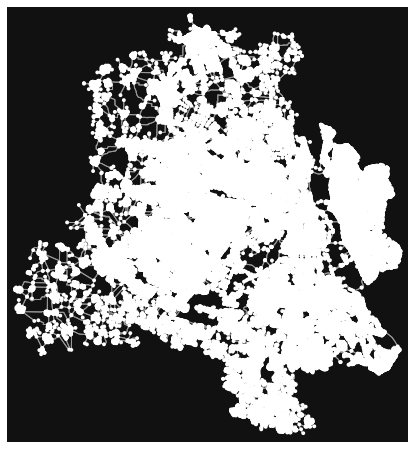

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
#plot graph
ox.plot_graph(delhi)

In [57]:
# retrieve extent of our area
area = ox.geocode_to_gdf(place)
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((76.83884 28.57323, 76.83889 28.57266...",28.883446,28.404629,77.346601,76.838835,256832545,relation,1942586,28.627393,77.171695,"Delhi, India",boundary,administrative,0.860289


In [56]:
type(area)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

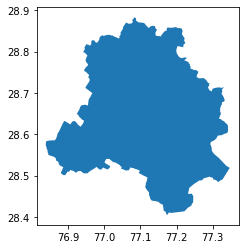

In [53]:
area.plot()

In [64]:
# Extracting building footprints
buildings = ox.geometries.geometries_from_place(place,tags = {'building':True})

In [66]:
buildings.head(2)

building  \
element_type osmid                
node         438049077   office   
             541347410      yes   

                                                                     name  \
element_type osmid                                                          
node         438049077  CRIS Office - Centre for Railways Information ...   
             541347410            KHOJ International Artists' Association   

                                         geometry addr:housename  \
element_type osmid                                                 
node         438049077  POINT (77.18510 28.58367)            NaN   
             541347410  POINT (77.21726 28.53104)   KHOJ Studios   

                               addr:housenumber addr:postcode  \
element_type osmid                                              
node         438049077                      NaN           NaN   
             541347410  S-17, Khirkee Extension        110017   

                                  source tourism railway stars  ...  \
element_type osmid                                              ...   
node         438049077               NaN     NaN     NaN   NaN  ...   
             541347410  khojworkshop.org     NaN     NaN   NaN  ...   

                       residential  lit clothes ways name:pl max_level  \
element_type osmid                                                       
node         438049077         NaN  NaN     NaN  NaN     NaN       NaN   
             541347410         NaN  NaN     NaN  NaN     NaN       NaN   

                       min_level non_existent_levels castle_type name:cs  
element_type osmid                                                        
node         438049077       NaN                 NaN         NaN     NaN  
             541347410       NaN                 NaN         NaN     NaN  

[2 rows x 267 columns]

In [67]:
len(buildings)

222544

In [70]:
#available columns
buildings.columns

Index(['building', 'name', 'geometry', 'addr:housename', 'addr:housenumber',
       'addr:postcode', 'source', 'tourism', 'railway', 'stars',
       ...
       'residential', 'lit', 'clothes', 'ways', 'name:pl', 'max_level',
       'min_level', 'non_existent_levels', 'castle_type', 'name:cs'],
      dtype='object', length=267)

In [71]:
len(buildings.columns)

267

In [72]:
nodes, edges = ox.graph_to_gdfs(delhi)

<AxesSubplot:>

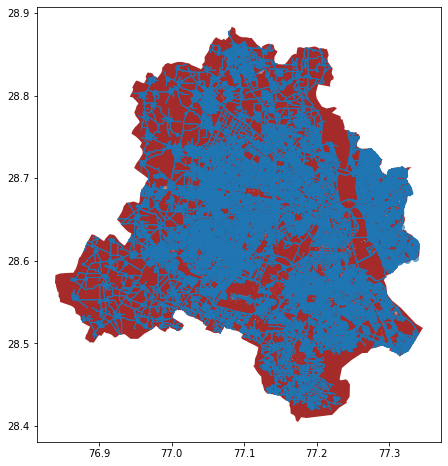

In [90]:
## PLOTTING THE DATA
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,8))


area.plot(ax=ax,facecolor = "brown")

buildings.plot(ax=ax,alpha=0.6,facecolor = "silver")

edges.plot(ax=ax,linewidth=1)
